## KNN Classification on Iris Dataset

# Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

# Step 1: Load the CSV dataset

In [8]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\project\Iris.csv")

# Step 2: Explore the dataset

In [ ]:
print("Dataset Sample:")
print(df.head())


Dataset Sample:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Step 3: Prepare features and labels

In [10]:
X = df.drop(columns=["Id", "Species"])
y = df["Species"]


# Step 4: Encode target labels

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 5: Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Normalize the data

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Try different K values

In [14]:
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))
    print(f"K={k} → Accuracy={acc:.2f}")

K=1 → Accuracy=1.00
K=3 → Accuracy=1.00
K=5 → Accuracy=1.00
K=7 → Accuracy=1.00
K=9 → Accuracy=1.00


# Step 8: Final model with best K (say K=3)

In [17]:
best_k = 3
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluation

In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 10: Plot Accuracy vs K

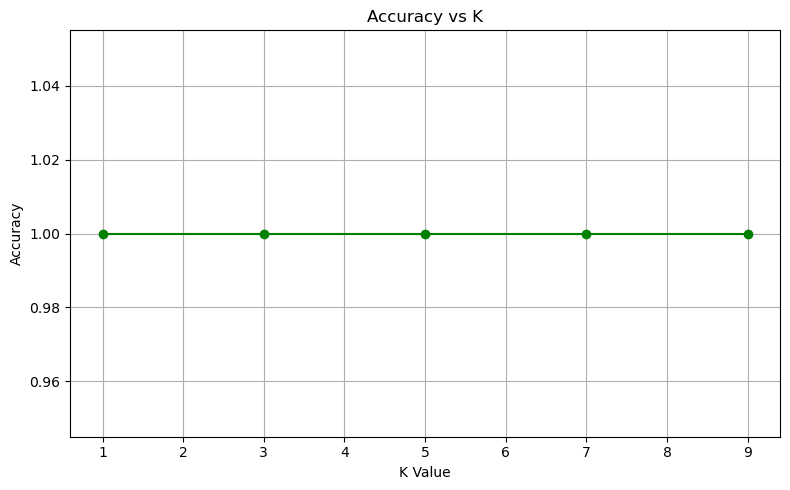

In [5]:
plt.figure(figsize=(8, 5))
plt.plot([k for k, _ in accuracies], [acc for _, acc in accuracies],
         marker='o', color='green')
plt.title('Accuracy vs K')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()